Pada Latihan kali ini, akan menerapkan teknik data wraagling atau pembersihan data dengan menggunakan beberapa fungsi atau method yang sudah di bahasa pada teori, jadi hasil nya adalah data yg bersih dan siap untuk di pakai

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Harus di Jalankan / Running
#sebelum menjalankan cell berikutnya, jika tidak akan error

**Memuat tabel** dan membuat dataframe

In [ ]:
mhs_df = pd.read_csv('/content/mahasiswa.csv')

# untuk mendapatkan link file (/content/mahasiswa.csv) harus upload filenya dan copy path pada titik 3 nama file, path bisa berbeda sesuai dengan nama file yang di masukan

#import file csv


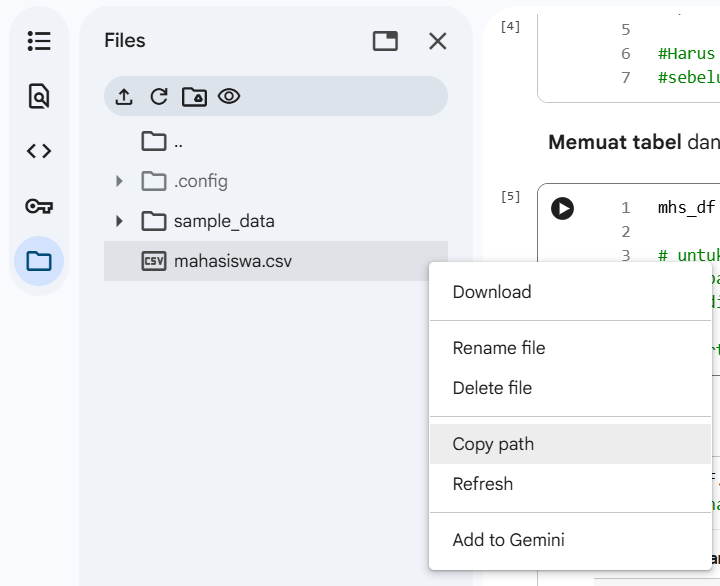

**Load tabel**

In [ ]:
mhs_df.head()
#melihat 5 data teratas

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
0,E0001,Aldi,Teknik,150,59.5,82.0,2024-05-05
1,E0002,Budi,teknik,20.0,84.5,99.0,2024-02-14
2,E0003,Citra,Energi,-5,56.2,78.0,2024-04-29
3,E0004,Dewi,Teknik,twenty,63.0,99.0,2024-08-02
4,E0005,Eka,Manajemen Energi,22.0,999,65.0,2024-03-22


In [ ]:
mhs_df.tail()
#melihat 5 data terakhir

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
73,E0057,Fauzi,Energi,23.0,58.2,76.0,2024-02-05
74,E0039,Mita,Energi,23.0,77.2,79.0,2024-01-04
75,E0069,Salsa,Informatika,23.0,63.4,86.0,2024-04-14
76,E0031,Eros,Informatika,23.0,68.0,66.0,2024-02-27
77,E0026,Zara,Informatika,24.0,90.4,82.0,2024-11-24


**Assessing Data**

In [ ]:
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nim             78 non-null     object 
 1   nama            78 non-null     object 
 2   jurusan         76 non-null     object 
 3   umur            76 non-null     object 
 4   nilai_akhir     76 non-null     object 
 5   kehadiran_pct   76 non-null     float64
 6   tanggal_daftar  76 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.4+ KB


dari hasil infor terdapat jumlah data yg tidak konsisten ada 2 kolom yg jumlah nya 28 sedangkan yg lainya hanya 76

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,2
umur,2
nilai_akhir,2
kehadiran_pct,2
tanggal_daftar,2


Terdapat 5 kolom yang NaN atau missing values

In [ ]:
print("Jumlah duplikasi: ", mhs_df.duplicated().sum())

Jumlah duplikasi:  8


Lalu terdapat juga 8 data duplikasi

**Cleaning Data**

Menghilangkan duplicate data dengan  drop_duplicates()

In [ ]:
mhs_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", mhs_df.duplicated().sum())

Jumlah duplikasi:  0


Sekarang data duplikat sudah selesai

**Menangani missing value**

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,2
umur,2
nilai_akhir,2
kehadiran_pct,2
tanggal_daftar,2


In [ ]:
mhs_df['jurusan'] = mhs_df['jurusan'].fillna("Pembangkit Energi")

#di sini untuk jurusan di isi dengan "Pembangkit Energi"

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,0
umur,2
nilai_akhir,2
kehadiran_pct,2
tanggal_daftar,2


In [ ]:
mhs_df['umur'] = mhs_df['umur'].fillna(23)

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,0
umur,0
nilai_akhir,2
kehadiran_pct,2
tanggal_daftar,2


In [ ]:
mhs_df['nilai_akhir'] = pd.to_numeric(mhs_df['nilai_akhir'], errors='coerce') #konversi tipe data menjadi numeric yaitu float

mhs_df['nilai_akhir'].mean() #mecari rata-rata

np.float64(88.15384615384616)

In [ ]:
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nim             70 non-null     object 
 1   nama            70 non-null     object 
 2   jurusan         70 non-null     object 
 3   umur            70 non-null     object 
 4   nilai_akhir     65 non-null     float64
 5   kehadiran_pct   68 non-null     float64
 6   tanggal_daftar  68 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.4+ KB


Jika kita lihat di sini tipe dara pada nilai_akhir sudah berubah menjadi float

In [ ]:
mhs_df['nilai_akhir'] = mhs_df['nilai_akhir'].fillna(88)
#sekarang isi missing value pada nilai_akhir dengan nilai rata-rata yg sudah di dapat sebelumnya

In [ ]:
mhs_df.isna().sum()
#cek hasilnya

,0
nim,0
nama,0
jurusan,0
umur,0
nilai_akhir,0
kehadiran_pct,2
tanggal_daftar,2


**Lakukan untuk kolom Kehadiran**

In [ ]:
mhs_df['kehadiran_pct'] = pd.to_numeric(mhs_df['kehadiran_pct'], errors='coerce') #konversi tipe data menjadi numeric yaitu float

mhs_df['kehadiran_pct'].mean() #mecari rata-rata

np.float64(82.13235294117646)

In [ ]:
mhs_df['kehadiran_pct'] = mhs_df['kehadiran_pct'].fillna(82)
#sekarang isi missing value pada nilai_akhir dengan nilai rata-rata yg sudah di dapat sebelumnya

In [ ]:
mhs_df.isna().sum()
#cek hasilnya

,0
nim,0
nama,0
jurusan,0
umur,0
nilai_akhir,0
kehadiran_pct,0
tanggal_daftar,2


Lakukan untuk kolom tanggal daftar

In [ ]:
mhs_df['tanggal_daftar'] = mhs_df['tanggal_daftar'].fillna('2024-03-24')

# karena tanggal lagir di sini bertipe string jadi langsung masukan saja tidak perlu di cari rata-rata nya atau konversi ke numerik

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,0
umur,0
nilai_akhir,0
kehadiran_pct,0
tanggal_daftar,0


Sekarang tidak ada lagi data missing atau NaN

**Menangani inaccurate value**

In [ ]:
mhs_df.jurusan.value_counts()

,count
jurusan,
Energi,21
Informatika,17
Teknik,12
Manajemen Energi,11
Pembangkit Energi,2
teknik,1
energi,1
ManajemenEnergi,1
EnErGi,1


In [ ]:
mhs_df.umur.value_counts()

,count
umur,
23.0,15
25.0,10
20.0,9
24.0,9
22.0,8
19.0,7
21.0,4
23,2
150,1


Terdapat 2 kolom yang datanya tidak akurat atau  inaccurate value

In [ ]:
mhs_df['jurusan'] = mhs_df['jurusan'].str.lower().str.strip()
#ubah menjadi huruf kecil

In [ ]:
mhs_df.jurusan.value_counts()

,count
jurusan,
energi,24
informatika,17
teknik,14
manajemen energi,11
pembangkit energi,2
manajemenenergi,1
eng,1


In [ ]:
#untuk memudahkan replacing maka di buatkan mapping jurusan sesuai dengan yg di inginkan, dengan kata-kata yg mirip di masukan ke jurusan yg seusai

mapping_jurusan = {
    "energi": "Pembangkit Energi",
    " energi ": "Pembangkit Energi",
    "ENERGI": "Pembangkit Energi",
    "EnErGi": "Pembangkit Energi",
    "eng": "Pembangkit Energi",
    "teknik": "Pembangkit Energi",
    "Teknik ": "Pembangkit Energi",
    "teknik ": "Pembangkit Energi",
    "manajemenenergi": "Manajemen Energi",
    "manajemen energi": "Manajemen Energi"
}

In [ ]:
mhs_df["jurusan"] = mhs_df["jurusan"].replace(mapping_jurusan)

In [ ]:
mhs_df["jurusan"] = mhs_df["jurusan"].str.title()

#kemablikan menjadi huruf besar

In [ ]:
mhs_df.jurusan.value_counts()

,count
jurusan,
Pembangkit Energi,41
Informatika,17
Manajemen Energi,12


In [ ]:
print("Hasil setelah normalisasi dan pemetaan:")
print(mhs_df['jurusan'].value_counts())

Hasil setelah normalisasi dan pemetaan:
jurusan
Pembangkit Energi    41
Informatika          17
Manajemen Energi     12
Name: count, dtype: int64


Sekarang untuk inaccurate  value pada kolom jurusan sudah selesai dan tidak da yg type atau tidak terkelompok dengan benar

**Selanjutnya lakuakan untuk kolom nilai **

In [ ]:
mhs_df.umur.value_counts()

,count
umur,
23.0,15
25.0,10
20.0,9
24.0,9
22.0,8
19.0,7
21.0,4
23,2
150,1


di sini terlihat beberapa data yg tidak konsisten seperti (150, -5, twenty, 120,NaN_string, 21years

Selanjutnya lakukan seperti pada kolom jurusan , bisa di lakukan mapping atau di ganti satu persatu, karena di sini jumlah data yg inkonsisten hanya satum jadi bisa di replace saja

In [ ]:
mhs_df['umur'] = mhs_df['umur'].replace('twenty', 20)

#bisa di lakuakn replace satu persatu seperti ini
# dari sebelumnya twenty menjadi 20

In [ ]:
print(mhs_df['umur'].value_counts())

umur
23.0          15
25.0          10
20.0           9
24.0           9
22.0           8
19.0           7
21.0           4
23             2
150            1
20             1
-5             1
120            1
NaN_string     1
21years        1
Name: count, dtype: int64


Bisa di lakuakn replace satu persatu seperti di atas atau mapping kembali seperti jurusan sebelumnya

In [ ]:
"""mapping_umur = {
    'twenty': 20,
    '21years': 21,
    'NaN_string': np.nan,
    -5: np.nan,
    120: np.nan,
    150: np.nan
}
"""
#untuk nilai yang NaN_string, -5, 120, 150 bisa langsung di ganti dengan rata-rata umur atau di jadikan missing value, tetapi jika di jadikan missing value maka setelah ini anda akan mengganti missing value tersebut, jadi sebelum itu lebih baik  di cari rata-rata nya terlebih dahulu lalu di ganti pada mappingan ini

In [ ]:
mhs_df['umur'] = pd.to_numeric(mhs_df['umur'], errors='coerce')
mhs_df['umur'].mean()

np.float64(25.220588235294116)

Sekarang setelah di konversi menjadi numerik maka di dapat nilai rata-rata, dan selanjutnya isikan pada mappinganya

In [ ]:
mapping_umur = {
    'twenty': 20,
    '21years': 21,
    'NaN_string': 25,
    -5: 25,
    120: 25,
    150: 25
}

In [ ]:
mhs_df['umur'] = mhs_df['umur'].replace(mapping_umur)

In [ ]:
print("Hasil setelah pemetaan:")
print(mhs_df['umur'].value_counts())
print(f"\nTipe data kolom 'umur' sekarang: {mhs_df['umur'].dtype}")

Hasil setelah pemetaan:
umur
23.0    17
25.0    13
20.0    10
24.0     9
22.0     8
19.0     7
21.0     4
Name: count, dtype: int64

Tipe data kolom 'umur' sekarang: float64


Sekarang kolom umur sudah tidak ada lagi data yg inaccruate,tetapi harus di pastikan lagi seperti di bawah ini

In [ ]:
mhs_df.isna().sum()
#ternyata terdapat 2 nilai yang NaN pada kolom umur

,0
nim,0
nama,0
jurusan,0
umur,2
nilai_akhir,0
kehadiran_pct,0
tanggal_daftar,0


In [ ]:
mhs_df.head(50)
#untuk memastika bisa menggunakan sintaks di atas dengan masukan value baris yang ingin di lihat, cara ini juga bisa di lakukan untuk tail(50)

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
0,E0001,Aldi,Pembangkit Energi,25.0,59.5,82.0,2024-03-24
1,E0002,Budi,Pembangkit Energi,20.0,84.5,99.0,2024-03-24
2,E0003,Citra,Pembangkit Energi,25.0,56.2,78.0,2024-03-24
3,E0004,Dewi,Pembangkit Energi,20.0,63.0,99.0,2024-03-24
4,E0005,Eka,Manajemen Energi,22.0,999.0,65.0,2024-03-24
5,E0006,Fajar,Pembangkit Energi,21.0,-20.0,78.0,2024-03-24
6,E0007,Gina,Informatika,19.0,70.2,150.0,2024-03-24
7,E0008,Hendra,Pembangkit Energi,25.0,56.7,-10.0,2024-03-24
8,E0009,Ika,Informatika,25.0,58.2,83.0,2024-03-24
9,E0010,Joko,Pembangkit Energi,23.0,62.7,69.0,2024-03-24


In [ ]:
mhs_df.tail(50)

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
20,E0021,Uli,Pembangkit Energi,24.0,78.4,90.0,2024-03-24
21,E0022,Vina,Pembangkit Energi,NaN,75.4,70.0,2024-03-24
22,E0023,Wawan,Pembangkit Energi,20.0,80.1,92.0,2024-03-24
23,E0024,Xena,Informatika,22.0,70.3,94.0,2024-03-24
24,E0025,Yudi,Pembangkit Energi,23.0,89.4,65.0,2024-03-24
25,E0026,Zara,Informatika,24.0,90.4,82.0,2024-03-24
26,E0027,Arif,Pembangkit Energi,19.0,66.7,75.0,2024-03-24
27,E0028,Bima,Pembangkit Energi,24.0,90.0,81.0,2024-03-24
28,E0029,Cici,Pembangkit Energi,23.0,91.5,84.0,2024-03-24
29,E0030,Dani,Pembangkit Energi,20.0,88.0,75.0,2024-03-24


Terdapat Missing value pada baris 21 dan 54

untuk itu bisa di lakukan replace lagi dengan memasukan rata-rata umur seperti sebelumnya

In [ ]:
mhs_df['umur'].mean() #mencari rata-rata

np.float64(22.426470588235293)

In [ ]:
mhs_df['umur'] = mhs_df['umur'].fillna(22) #isi dengan nilai rata-rata

In [ ]:
mhs_df.isna().sum()

,0
nim,0
nama,0
jurusan,0
umur,0
nilai_akhir,0
kehadiran_pct,0
tanggal_daftar,0


Setelah di cek sudah tidak ada lagi data yang missing pada semua kolom data

In [ ]:
mhs_df.duplicated().sum()

np.int64(0)

Untuk pulikat juga sama tidak ada data yang duplikat

Untuk memverifikasi bisa show head() dan tail() seperti di bawah ini atau count duplicates() dan isnan()

In [ ]:
mhs_df.head(55)

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
0,E0001,Aldi,Pembangkit Energi,25.0,59.5,82.0,2024-03-24
1,E0002,Budi,Pembangkit Energi,20.0,84.5,99.0,2024-03-24
2,E0003,Citra,Pembangkit Energi,25.0,56.2,78.0,2024-03-24
3,E0004,Dewi,Pembangkit Energi,20.0,63.0,99.0,2024-03-24
4,E0005,Eka,Manajemen Energi,22.0,999.0,65.0,2024-03-24
5,E0006,Fajar,Pembangkit Energi,21.0,-20.0,78.0,2024-03-24
6,E0007,Gina,Informatika,19.0,70.2,150.0,2024-03-24
7,E0008,Hendra,Pembangkit Energi,25.0,56.7,-10.0,2024-03-24
8,E0009,Ika,Informatika,25.0,58.2,83.0,2024-03-24
9,E0010,Joko,Pembangkit Energi,23.0,62.7,69.0,2024-03-24


In [ ]:
mhs_df.tail()

,nim,nama,jurusan,umur,nilai_akhir,kehadiran_pct,tanggal_daftar
65,E0066,Oleh,Pembangkit Energi,23.0,94.4,98.0,2024-03-24
66,E0067,Putri,Pembangkit Energi,24.0,59.1,82.0,2024-03-24
67,E0068,Rafi,Informatika,19.0,84.7,74.0,2024-03-24
68,E0069,Salsa,Informatika,23.0,63.4,86.0,2024-03-24
69,E0070,Tasya,Manajemen Energi,23.0,74.5,68.0,2024-03-24


In [ ]:
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nim             70 non-null     object 
 1   nama            70 non-null     object 
 2   jurusan         70 non-null     object 
 3   umur            70 non-null     float64
 4   nilai_akhir     70 non-null     float64
 5   kehadiran_pct   70 non-null     float64
 6   tanggal_daftar  70 non-null     object 
dtypes: float64(3), object(4)
memory usage: 6.4+ KB


JIka di lihat pada info, maka semua jumlah data sama yaitu 70, maka proses Pembersihan data sudah selesai

Export data yang sudah di bersihkan menjadi file csv, menggunakan script berikut ini

In [ ]:
mhs_df.to_csv("mahasiswa_clean.csv", index=False)

Lalu lakukan Dodownload file csv yang sudah di export sebelumnya

In [ ]:
from google.colab import files
files.download("nahasiswa_clean.csv")

Bandingkan hasil data csv sebelumnya dengan csv yang sudah di bersihkan
bisa di buka menggunakan excel / spreadsheet untuk membandingaknya

**Silahkan di jelskan langkah-langkah dan hasil latihan pada laporan**

---



In [ ]:
test_df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
test_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
test_df.head(60)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
